## Priprava podatkov, osnovne statistike in vizualizacija

Podatkovno rudarjenje, naloga, `21. 03. 22`  
**Luka Krivec**


Neizogiben del vsakega projekta na področju podatkovnega rudarjenja je iskanje,
urejanje in priprava podatkov. V tej nalogi boste spoznali primer podatkovne
zbirke in uporabili postopke za pretvorbo podatkov v ustrezno obliko ter pregled in
prikaz osnovnih statistik.

### Podatki

V nalogi boste pregledali in pripravili podatke gledanosti Hollywoodskih filmov
zbirke [MovieLens](https://grouplens.org/datasets/movielens/) v obdobju **1995-2016**.

Iste podatke boste uporabili v vseh nalogah, zato jih dodobra spoznajte. Gre za podatkovno zbirko za
vrednotenje priporočilnih sistemov, ki vsebuje gledalce ter njihove ocene za posamezni film na lestvici 1 do 5. 
Poleg osnovne matrike uporabnikov in ocen vsebuje še dodatne podatke o filmih (npr. žanr, datum, oznake,
igralci).

Podatki so v mapi `./podatki/ml-latest-small`. Podatkovna zbirka vsebuje naslednje datoteke:

* ratings.csv: podatki o uporabnikih in ocenah,
* movies.csv: podatki o žanrih filmov,
* cast.csv: podatki o igralcih,
* tags.csv: podatki o oznakah (ang. \emph{tags}),
* links.csv: povezave na sorodne podatkovne zbirke.


Pred pričetkom reševanja naloge si dobro oglejte podatke in datoteko **README.txt**. Podrobnosti o zbirki lahko preberete na [spletni strani](http://files.grouplens.org/datasets/movielens/ml-latest-small-README.html).

Pripravite metode za nalaganje podatkov v ustrezne podatkovne strukture. Te vam bodo prišle
prav tudi pri nadaljnjih nalogah.
Bodite pozorni na velikost podatkov.

Zapišite kodo za branje datotek in pripravo ustreznih matrik (in drugih struktur) podatkov, ki jih boste uporabi pri odgovarjanju na spodnja vprašanja.

Kodo lahko razdelite v več celic.

In [436]:
%matplotlib inline
%config InlineBackend.figure_formats = ['jpg']
import matplotlib
matplotlib.figure.Figure.__repr__ = lambda self: (
    f"<{self.__class__.__name__} size {self.bbox.size[0]:g}"
    f"x{self.bbox.size[1]:g} with {len(self.axes)} Axes>")

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from Orange.data.filter import SameValue
from Orange.data import Table
from csv import DictReader
import numpy as np
import collections



In [437]:

np.set_printoptions(suppress=True, precision=4)

ocene = np.loadtxt('podatki/ml-latest-small/ratings.csv', delimiter=",", skiprows=1).astype(int)


### Vprašanja

Glavni namen podatkovnega rudarjenja je *odkrivanje znanj iz podatkov*,
torej odgovarjanje na vprašanja z uporabo računskih postopkov.

Z uporabo principov, ki ste jih spoznali na vajah in predavanjih, odgovorite na
spodnja vprašanja. Pri vsakem vprašanju dobro premislite, na kakšen način boste
najbolje podali, prikazali oz. utemeljili odgovor. Bistven del so odgovori na
vprašanja in ne implementacija vaše rešitve.

#### 1. vprašanje (15%):
Kateri filmi so v povprečju najbolje ocenjeni?  Pripravite seznam
filmov ter njihovih povprečnih ocen in izpišite 10 filmov z vrha seznama.
Opazite pri takem ocenjevanju kakšno težavo? Kako bi jo lahko rešili? Kakšni so
rezultati tedaj?

Kodo lahko razdelite v več celic.

In [420]:
#unikatni filmi po atributu movieID
unikat_filmi = np.unique(ocene[:,1])

# unikat_filmi.shape
# np.sort(unikat_filmi)

# seznam filmov in njihove povprecne ocene
povprecja = [[np.mean(ocene[(ocene[:,1]==movieID),2]),movieID] for movieID in unikat_filmi]
urejeni = sorted(povprecja, key=lambda t: t[0], reverse=True)

#izpis
print("Ocena filma | moviID")
print("--------------------")
for i in range(10):
    print(f"     {urejeni[i][0]}    |  {urejeni[i][1]}")


Ocena filma | moviID
--------------------
     5.0    |  53
     5.0    |  183
     5.0    |  301
     5.0    |  309
     5.0    |  559
     5.0    |  702
     5.0    |  759
     5.0    |  764
     5.0    |  820
     5.0    |  845


**Odgovor:**  
Najprej ustvarim array z vsemi unikatnimi filmi skozi katerega se bom premikal, ko bom vpisoval povprecno vrednost ocene za vsak film.    
Ustvarim seznam seznamov, ki vsebuje povprecno vrednost ocen filma in njegov ID.    
Nato seznam uredim padajoce po vrednosti povprecne ocene.  
Izpisem prvih 10 vrednosti.  
  
Opazim da ima vseh 10 filmov perfektno povprecno oceno 5.  
Tu se pojavi tezava, ki jo bom reseval v naslednji vrstici.  


In [422]:
#Pridobi stevila ocen za vsak film
unique, counts = np.unique(ocene[:,1], return_counts=True)
st_ocen = dict(zip(unique, counts))
st_ocen

# Pridobi povprecno stevilo ocen
avg_nb_rating= np.mean(counts)
# print(avg_nb_rating) 
# avg_nb_rating = 11.030664019413193

najbolse_povprecje = []
for movieID in unikat_filmi:
    if st_ocen[movieID] >= 11:
        najbolse_povprecje.append([np.mean(ocene[(ocene[:,1]==movieID),2]),movieID])


        
urejeni_najbols = sorted(najbolse_povprecje, key=lambda t: t[0], reverse=True)  

#izpis
print("Ocena filma | moviID")
print("--------------------")
for i in range(10):
    print("     {:.2f}   |  {}".format(urejeni_najbols[i][0],urejeni_najbols[i][1]))

Ocena filma | moviID
--------------------
     4.64   |  1939
     4.50   |  3469
     4.42   |  1948
     4.41   |  3035
     4.41   |  318
     4.39   |  858
     4.37   |  926
     4.36   |  1066
     4.36   |  2202
     4.36   |  2064


**Odgovor:**  
Ustvarim slovar filmov in stevila ocen, ki jih ima.    
Hitro opazim, da imajo najbolje ocenjeni filmi iz prejsne vrstice samo eno oceno, perfektno 5.  
To nepravicno ocenjevanje in ne odraza realnega mnenja in ocene filma, saj imajo najbolje ocenjeni filmi premalo ocen.
Odlocim se, da bom ocenjeval filme, ki imajo dovolj ocen.  
Mejo najdem tako, da pridobim povprecno stevilo ocen na film. Ta znasa malo cez 11.  
Ponovno ustvarim seznam seznamov filmov in njihove povprecne ocene, a tokrat je pogoj, da film pristane na seznamu ta, da mora imeti vec ali enako ocen kot 11.  
  
Rezultati je zadovoljivi, najbolsa povprecna ocena je 4.64.

#### 2. vprašanje (15%):
Posamezni film pripada enemu ali več žanrom. 
Koliko je vseh žanrov? Prikaži porazdelitev žanrov z uporabo ustrezne
vizualizacije.

Kodo lahko razdelite v več celic.

In [424]:
#Preberem podatke iz movies.csv
filmi = DictReader(open('podatki/ml-latest-small/movies.csv', 'rt', encoding='utf-8'))

#Ustvarim slovar, ki bo stel pojavitve
zanr_count = collections.defaultdict(int)

#Pristevam pojavitve seznamu
for row in filmi:
    for zanr in row['genres'].split("|"):
        if zanr == '(no genres listed)':
            zanr_count['Ni podatka']+=1
        else:
            zanr_count[zanr]+=1

urejeni_zanr = {k: v for k, v in sorted(zanr_count.items(), key=lambda item: item[1], reverse=True)}
urejeni_zanr

{'Drama': 4365,
 'Comedy': 3315,
 'Thriller': 1729,
 'Romance': 1545,
 'Action': 1545,
 'Adventure': 1117,
 'Crime': 1100,
 'Horror': 877,
 'Sci-Fi': 792,
 'Fantasy': 654,
 'Children': 583,
 'Mystery': 543,
 'Documentary': 495,
 'Animation': 447,
 'Musical': 394,
 'War': 367,
 'Western': 168,
 'IMAX': 153,
 'Film-Noir': 133,
 'Ni podatka': 18}

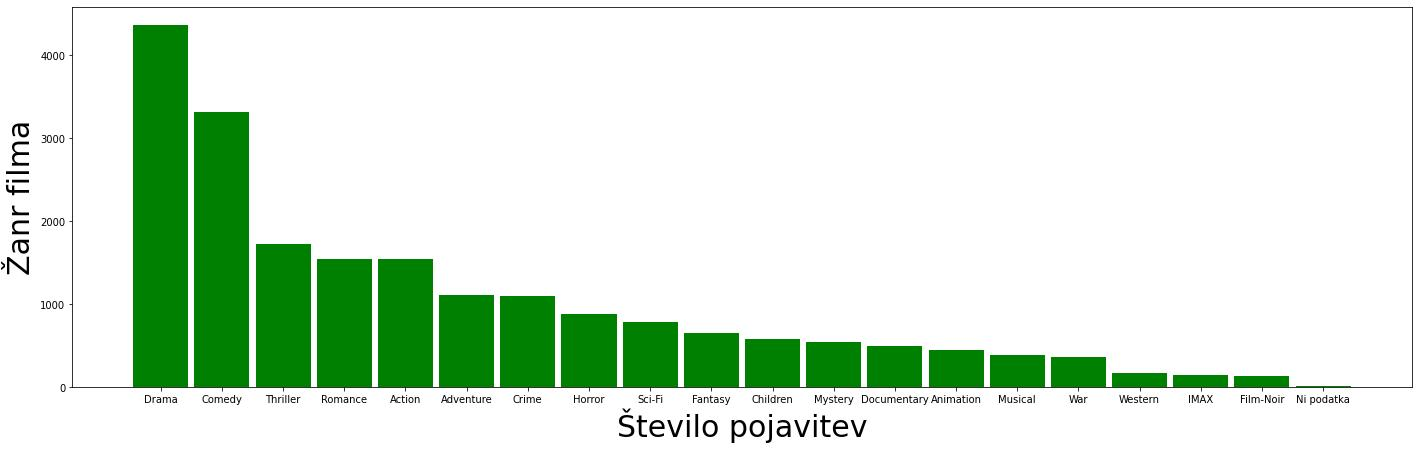

In [425]:
#Izrisem barplot

plt.figure(figsize=(24,7))
# mylist = [key for key, val in zanr_count.items() for _ in range(val)]
# plt.hist(mylist, density=True, bins=20)
plt.bar(list(urejeni_zanr.keys()), urejeni_zanr.values(), color='g', width=0.9)
plt.xlabel('Število pojavitev', size=30)
plt.ylabel('Žanr filma', size=30);

**Odgovor:**  
Preberem podatke iz datoteke movies.csv v slovar, s pomocjo ukaza DictReader    
Ustvarim collections slovar, ki bo stel pojavitve.   
Z zanko se sprehodim cez vse vrstice podatkov in ustvariom seznam nizov v atributu 'genres' s pomocjo ukaza split(), ki niz   razdeli na vec podnizov. Locevalni znak je "|".  
Kjucu slovarja, ki je eden iz med moznih zanrov pristejem 1, ce se niza oz. zanra ujemata. 
Ce film ni opredeljen, sej vrednost pristeje kljucu "Ni podatka
Uredim pridobljeni slovar in izrisem barplot.

#### 3. vprašanje (20%):
Število ocen (ogledov) se za posamezni film razlikuje. Ali
obstaja povezava med gledanostjo in povprečno oceno filma? Opišite postopek, ki
ste ga uporabili pri odgovarjanju na vprašanje.

Kodo lahko razdelite v več celic.

In [426]:
#Ustvari seznam seznamov z vrednostmi movieID, ocena, st ogledov
ogled_ocena = [[movieID,np.mean(ocene[(ocene[:,1]==movieID),2]), st_ocen[movieID]] for movieID in unikat_filmi]

#Pretvori 2d list v array
ogled_ocena = np.array(ogled_ocena) 
ogled_ocena

#Pearsonova korelacija
def pearson(x, y):
    return np.mean(((x - np.mean(x))*(y-np.mean(y)))/(np.std(x)*np.std(y)))



x = ogled_ocena[:, 1]    # ocena
y = ogled_ocena[:, 2]    # ogled

pearson(x, y)
# pearson(x, y) = 0.13866661583949302
   
 

0.13866661583949302

Text(0, 0.5, 'ogled')

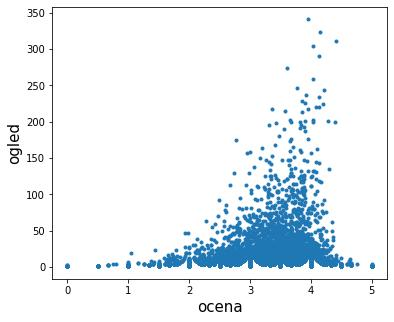

In [500]:
#Izris scatterplot
plt.figure(figsize=(6,5))
x = ogled_ocena[:, 1]    # ocena
y = ogled_ocena[:, 2]    # ogled
plt.plot(x, y, ".")
plt.xlabel('ocena', size=15)
plt.ylabel('ogled', size=15)

**Odgovor:**  
Ustvaril sem nov seznam seznamov s 3 vrednostmi: movieID, ocena filma ter stevilo ocen(ogledov) filma.    
Ustaril sem ga s pomocjo prejsnih ze definiranh podatkovnih struktur st_ocen, unikat_filmi ter ocene.  
Dvodimenzionalni python seznam sem pretvoril v numpy array.  
  
Na odgovor ali obstaja povezava med gledanostjo in povprečno oceno filma, sem poskusil odgovoriti z izracunom korelacije med   dvema atributoma. Uporabil sem Pearsonov pristop.  

Definiral sem funkcijo in vnesel podatke.   
Prisel sem do rezulatata 0.13867, ki mi pove, da obstaja majhna, zanemarljiva korelacija med atributoma.  
Atributa sta torej (razen nekaj osamelcev iz 1. naloge) neodvisna.  
  
Da sem se preprical v rezultat in si lazje predstavljal samo korelacijo, sem izrisal razsevni diagra, ki da jasen rezultat. 

#### 4. vprašanje (30%):
Vsaka ocena je bila vnešena na določen datum (stolpec
*timestamp*).  Ali se popularnost posameznih filmov s časom spreminja?
Problem reši tako, da za dani film ocene razporediš po času ter v vsaki časovni
točki izračunaš povprečje za zadnjih 30, 50, ali 100 ocen. Nariši graf, kako se
ocena spreminja in ga prikaži za dva zanimiva primera filmov.

Kodo lahko razdelite v več celic.

In [428]:
#Pogledam kateri filmi imajo najvec ocen, dajih bom kasneje podrobneje analiziral. 
najv_ocen = dict(sorted(st_ocen.items(), key=lambda item: item[1],reverse=True)) 
# print(najv_ocen)
#Odlocim se za filma z id 356 in 318  


#ustvarim 2 slovarja z ocenami in datumi
forrest = {}
shaw = {}
for row in ocene:
    oc +=1
    if row[1] == 356:
        forrest[row[3]]= row[2]
    elif row[1] == 318:
        shaw[row[3]]= row[2]

#Uredim po datumu
forrest_sort = dict(sorted(forrest.items(), key=lambda item: item[0],reverse=False)) 
shaw_sort = dict(sorted(shaw.items(), key=lambda item: item[0],reverse=False))



#povpr n ocen
def povpr(n, slov):
    rez = {}
    zac = 0
    povpr = []
    for k,v in slov.items():
        
        povpr.append(v)
        zac +=1
        if zac >= n:
            rez[k]=sum(povpr)/n
            povpr.remove(povpr[0])
    return rez

neki = povpr(3,shaw_sort)

#forrest povprecje 30,50,100
forrest30 = povpr(30,forrest_sort)
forrest50 = povpr(50,forrest_sort)
forrest100 = povpr(100,forrest_sort)

forrest100

#shawshenk povprecje 30,50,100
shaw30 = povpr(30,shaw_sort)
shaw50 = povpr(50,shaw_sort)
shaw100 = povpr(100,shaw_sort)

# forrest30


In [429]:
from datetime import datetime

#Zacetni in koncni datum shawshenk
s30 = 840205118 #'1996-08-16 16:18'
s50 = 847465462 #'1996-11-08 16:04'
s100 = 971217748 #'2000-10-11 00:42'
eE = 1473803992 #'2016-09-13 23:59'

#Zacetni in koncni datum forrest
f30 = 840100475 #'1996-08-15 11:14'
f50 = 845157265 #'1996-10-12 23:54'
f100 = 942705608 #'1999-11-15 23:40'
fE = 1476478274 #'2016-10-14 22:51'

# ts = datetime.fromtimestamp(fE).strftime('%Y-%m-%d %H:%M')



In [430]:
from sklearn import preprocessing

#Forrest normalizirani X os in Y os
f30_ = np.fromiter(forrest30.keys(), dtype=int)
f30_X = preprocessing.normalize([f30_])
f30_Y = np.fromiter(forrest30.values(), dtype=float)

f50_ = np.fromiter(forrest50.keys(), dtype=int)
f50_X = preprocessing.normalize([f50_])
f50_Y = np.fromiter(forrest50.values(), dtype=float)

f100_ = np.fromiter(forrest100.keys(), dtype=int)
f100_X = preprocessing.normalize([f100_])
f100_Y = np.fromiter(forrest100.values(), dtype=float)

#Forrest normalizirani X os in Y os
s30_ = np.fromiter(shaw30.keys(), dtype=int)
s30_X = preprocessing.normalize([s30_])
s30_Y = np.fromiter(shaw30.values(), dtype=float)

s50_ = np.fromiter(shaw50.keys(), dtype=int)
s50_X = preprocessing.normalize([s50_])
s50_Y = np.fromiter(shaw50.values(), dtype=float)

s100_ = np.fromiter(shaw100.keys(), dtype=int)
s100_X = preprocessing.normalize([s100_])
s100_Y = np.fromiter(shaw100.values(), dtype=float)



Text(0.5, 0, 'ogled')

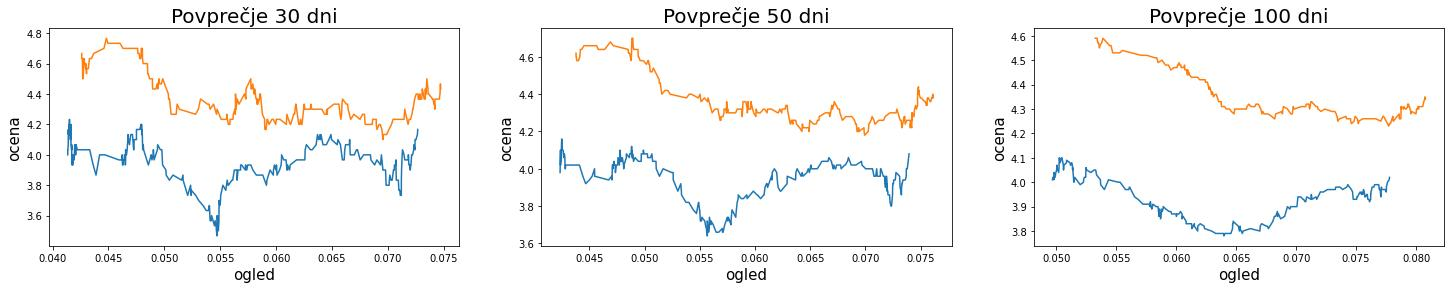

In [506]:
#Primerjava med filmoma v razlicnih obdobjih
fig, axes = plt.subplots(1, 3, figsize=(25, 4))

axes[0].plot(f30_X[0], f30_Y, s30_X[0], s30_Y)
axes[0].set_title('Povprečje 30 dni', size=20)
axes[0].set_ylabel('ocena', size=15)
axes[0].set_xlabel('ogled', size=15)

axes[1].plot(f50_X[0], f50_Y, s50_X[0], s50_Y)
axes[1].set_title('Povprečje 50 dni', size=20)
axes[1].set_ylabel('ocena', size=15)
axes[1].set_xlabel('ogled', size=15)

axes[2].plot(f100_X[0], f100_Y, s100_X[0], s100_Y)
axes[2].set_title('Povprečje 100 dni', size=20)
axes[2].set_ylabel('ocena', size=15)
axes[2].set_xlabel('ogled', size=15)



In [ ]:
#Primerjava filma Forrest Gump glede stevila dni
plt.figure(figsize=(15, 4))
plt.plot(f30_X[0], f30_Y, ".-")
plt.plot(f50_X[0], f50_Y, ".-")
plt.plot(f100_X[0], f100_Y, ".-")
plt.title("Povprečje višine ocen filma Forrest Gumb skozi čas")
plt.xlabel('leto', size=15)
plt.ylabel('ocena', size=15)
# my_xticks = ['John','Arnold','Mavis','Matt']
# plt.xticks(x, my_xticks)

**Odgovor:**  
Pogledam kateri filmi imajo najvec ocen, da jih bom kasneje podrobneje analiziral.  
Odlocim se za filma z id 356 in 318. To sta Forrest Gump in pa Shawshenk redemption.  
Ustvarim dva slovarja z ocenami in datumi.  
Uredim po datumu narascajoce. Napisem funkcijo, ki racuna povprecje zadnjih n ocen.
Rezultate vpisem v spremenljivke. Datume pretvorim v berljivo obliko, da si lazje predstavljam v kaksnem casovnem intervalu pregledujem ocene.  
Uvozim knjiznico sklearn s katero normaliziram datume.
Izrisem 3 grafe, za vsak graf razlicen n. Primerjam povprecne ocene obeh filmov skozi casovno obdobje.
Izrisem se en graf, kjer je lepo razvidno, da vecji kot je n, manj je nihanj med povprecjem ocen, bolj je krivulja linearna.




#### 5. vprašanje (20%):
Kako bi ocenili popularnost posameznih igralcev? Opišite postopek
ocenitve ter izpišite 10 najbolj popularnih igralcev.

Kodo lahko razdelite v več celic.

In [466]:
ocene = np.loadtxt('podatki/ml-latest-small/ratings.csv', delimiter=",", skiprows=1).astype(int)

#Preberem podatke iz movies.csv
igralci_reader = DictReader(open('podatki/ml-latest-small/cast.csv', 'rt', encoding='utf-8'))



#slovar vseh filmov nekega igralca
igralci = collections.defaultdict(list)
for row in igralci_reader:
    for igralec in row['cast'].split("|"):
        igralci[igralec].append(row['movieId'])
        
igralci

ocena_filma = collections.defaultdict(float)
for movieID in unikat_filmi:
    ocena_filma[int(movieID)] = np.mean(ocene[(ocene[:,1]==movieID),2])

ocena_filma






In [499]:

ocena_igr = {}
for k,v in igralci.items():
    divider = 0
    ocene = 0
    for movieId in v:
        divider +=1
        ocene += ocena_filma[int(movieId)]
    if divider >= 11:
        ocena_igr[k] = ocene/divider
    if k == 'Diego Luna':
        print(divider)
        


popularni = {k: v for k, v in sorted(ocena_igr.items(), key=lambda item: item[1], reverse=True)}

print(" popularnost |     igralec")
print("-----------------------------------")
for i in range(10):
    res = list(popularni.keys())
    print("     {:.2f}    |  {}".format(popularni[res[i]],res[i]))

11
 popularnost |     igralec
-----------------------------------
     3.96    |  Alec Guinness
     3.87    |  Takashi Shimura
     3.85    |  Charles Chaplin
     3.84    |  Derek Jacobi
     3.80    |  Cary Grant
     3.78    |  Jacqueline Bisset
     3.72    |  Audrey Hepburn
     3.72    |  Michael Palin
     3.71    |  Gregory Peck
     3.71    |  George Carlin


In [ ]:
plt.figure(figsize=(5, 6))

for si, sport in enumerate(sports):
    xs = heights_by_sport[sport]    # x os
    ys = [si for x in xs]           # y os je v visini sporta
    zs = weights_by_sport[sport]    # velikost točke je premosorazmerna s tezo
    
    for x, y, z in zip(xs, ys, zs): # rišemo točko po točko
        plt.plot(x, y, "m.", alpha=0.5, markersize=z/5)
            
plt.yticks(range(len(sports)))
plt.ylim(-0.5, len(sports)-0.5)
plt.gca().set_yticklabels(sports)
        
plt.xlabel("višina (m)")
plt.ylabel("šport");
plt.savefig('slike/odgovori/2-2-8.png', bbox_inches='tight')

**Odgovor:**  
Preberem podatke iz movies.csv s pomocjo dictreaderja.  

Vsakemu igralcu pripisem vse filme v katerih je igral in so bili ocenjeni.  
Za vsak film zracunam se povprecno oceno.  
Pri vsakem igralcu sestejem povprecne ocene v katerih je igral, ter delim s stevilom filmov. Iz podobnih razlogov kot v prvi nalogi, stejem samo igralce, ki so igrali v vsaj enajstih ocenjenih filmih.


#### Bonus vprašanje (5%):

Kateri je tvoj najljubši film? Zakaj?

Odgovor: **zapišite utemeljitev odgovora**

### Zapiski
Za nalaganje podatkov lahko uporabite modul `csv`.

In [335]:
from csv import DictReader

reader = DictReader(open('podatki/ml-latest-small/ratings.csv', 'rt', encoding='utf-8'))
for row in reader:
    user = row["userId"]
    movie = row["movieId"]
    rating = row["rating"]
    timestamp = row["timestamp"]

Podatki v zadnji vrstici datoteke:

In [336]:
user, movie, rating, timestamp

('671', '6565', '3.5', '1074784724')

Pretvorba časovnega formata (*Unix time*). Kode za oblikovanje so navedene v dokumentaciji modula [`datetime`](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior).

In [337]:
from datetime import datetime

t = 1217897793 # Unix-time
ts = datetime.fromtimestamp(t).strftime('%Y-%m-%d %H:%M')
ts

'2008-08-05 02:56'